In [1]:


from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data.dataloader import DataLoader
import torch
import ssapp.Utils as Utils
torch.manual_seed(42)
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

from ssapp.data.AntennaDatasetLoaders import PatchAntennaDataset

fig_save_dir = Path().cwd().parents[1] / 'reports' / 'figures'

dataset = PatchAntennaDataset()

BATCH_SIZE = len(dataset)
dataset_loader = DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True)



In [2]:
PARAMS,FIELDS = next(iter(dataset_loader))

FIELDS.shape
print(len(FIELDS))
print(PARAMS[:,1])

343
tensor([5.6667, 7.6667, 5.0000, 7.0000, 5.6667, 8.3333, 7.0000, 5.0000, 7.0000,
        5.6667, 5.0000, 8.3333, 5.6667, 7.0000, 7.6667, 7.6667, 6.3333, 5.6667,
        6.3333, 5.0000, 5.6667, 7.0000, 5.0000, 5.0000, 9.0000, 8.3333, 9.0000,
        5.0000, 5.0000, 5.6667, 5.0000, 8.3333, 7.6667, 5.6667, 6.3333, 8.3333,
        7.6667, 5.6667, 7.0000, 8.3333, 5.0000, 7.0000, 6.3333, 5.6667, 5.0000,
        5.0000, 7.6667, 9.0000, 5.6667, 6.3333, 9.0000, 9.0000, 5.0000, 8.3333,
        5.6667, 5.0000, 7.0000, 9.0000, 7.6667, 7.0000, 5.6667, 7.0000, 8.3333,
        6.3333, 5.0000, 9.0000, 8.3333, 7.0000, 8.3333, 9.0000, 5.6667, 7.6667,
        5.0000, 9.0000, 7.0000, 8.3333, 6.3333, 6.3333, 6.3333, 9.0000, 6.3333,
        5.0000, 8.3333, 6.3333, 8.3333, 9.0000, 6.3333, 7.0000, 5.0000, 9.0000,
        9.0000, 6.3333, 7.0000, 8.3333, 5.0000, 8.3333, 9.0000, 7.0000, 9.0000,
        7.0000, 5.6667, 9.0000, 6.3333, 8.3333, 7.6667, 7.6667, 5.0000, 5.0000,
        6.3333, 8.3333, 7.6667, 7.00

In [3]:
unique_params = np.array([np.unique(x) for x in PARAMS.T])
print(unique_params[1,1])


p1IDX = 1 
p2IDX = 2

pltField = FIELDS[np.logical_and(PARAMS[:,0] == unique_params[0,p1IDX],PARAMS[:,1] == unique_params[1,p2IDX]),::]

def singleParamSubField(field,params,p1IDX,p2IDX,fixed_params=(0,1)):
    unique_params = np.array([np.unique(x) for x in params.T])
    pltField = field[np.logical_and(params[:,fixed_params[0]] == unique_params[fixed_params[0],p1IDX],params[:,fixed_params[1]] == unique_params[fixed_params[1],p2IDX]),::]
    return pltField


print(singleParamSubField(FIELDS,PARAMS,0,1).shape)



5.6666665
torch.Size([7, 361, 3, 4])


/tmp/ipykernel_14450/238238518.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
  pltField = FIELDS[np.logical_and(PARAMS[:,0] == unique_params[0,p1IDX],PARAMS[:,1] == unique_params[1,p2IDX]),::]
/tmp/ipykernel_14450/238238518.py:12: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
  pltField = field[np.logical_and(params[:,fixed_params[0]] == unique_params[fixed_params[0],p1IDX],params[:,fixed_params[1]] == unique_params[fixed_params[1],p2IDX]),::]


Fixed Parameter 1 Value -1.3333334
Fixed Parameter 2 Value 6.3333335


/tmp/ipykernel_14450/238238518.py:12: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
  pltField = field[np.logical_and(params[:,fixed_params[0]] == unique_params[fixed_params[0],p1IDX],params[:,fixed_params[1]] == unique_params[fixed_params[1],p2IDX]),::]


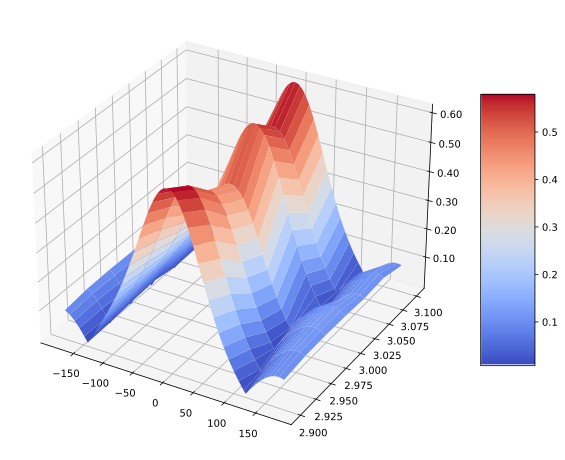

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (10,10))

# Make data.


from matplotlib import cm
from matplotlib.ticker import LinearLocator

p1IDX = 1
p2IDX = 2
fixed_params = (0,1)
var_param = 2

theta = np.linspace(-180, 180, 361)
cuts = np.linspace(unique_params[var_param,0], unique_params[var_param,-1], 7)
theta, cuts = np.meshgrid(theta, cuts)

Z = np.linalg.norm(singleParamSubField(FIELDS,PARAMS,0,3,fixed_params = fixed_params)[:,:,0,1:2],axis =2 )

print('Fixed Parameter 1 Value', unique_params[fixed_params[0],p1IDX])
print('Fixed Parameter 2 Value', unique_params[fixed_params[1],p2IDX])
# Plot the surface.
surf = ax.plot_surface(theta, cuts,Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Felt fra valfrit sted i det latente rum

In [8]:
# Træn PCA fra datasettet
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

param_names = ['Coax Placement-X','Coax Placement-Y','Substrate Permitivity']

pca_results = pca.fit_transform(FIELDS.reshape((len(FIELDS),-1)))
print(pca.explained_variance_ratio_)




[6.21330841e-01 3.35517468e-01 2.73575929e-02 1.54882828e-02
 2.88454191e-04]


In [7]:



latent_point = [2,0]

gen_field = pca.inverse_transform(latent_point).reshape(1,361,3,4)

theta = np.linspace(-180,180,361)

fig,axs = plt.subplots(nrows = 1,ncols = 2,figsize = (12,4))
axs[0].set_title('Co-Polar Reconstruction of Latent point: '+str(latent_point))
axs[0].set_xlabel('Theta')
axs[0].set_ylabel('Magnitude dB')
for i in range(0,3):
    pltField = 10*np.log10(np.sqrt(gen_field[0,:,i,0]**2+gen_field[0,:,i,1]**2))
    axs[0].plot(theta,pltField)
axs[1].set_title('Cross-Polar Reconstruction of Latent point: '+str(latent_point))
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('Magnitude dB')
for i in range(0,3):
    pltField = 10*np.log10(np.sqrt(gen_field[0,:,i,2]**2+gen_field[0,:,i,3]**2))
    axs[1].plot(theta,pltField)







ValueError: shapes (2,) and (5,4332) not aligned: 2 (dim 0) != 5 (dim 0)

In [ ]:
## Make Training Validation Set Split

from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from ssapp import Utils
from torch.utils.data.dataloader import DataLoader
from ssapp.data.AntennaDatasetLoaders import PatchAntennaDataset
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.gaussian_process.kernels import RBF
from sklearn import linear_model
import numpy as np

dataset = PatchAntennaDataset()

train_data, test_data = Utils.train_test_data_split(dataset, TRAIN_TEST_RATIO = 0.7)

train_loader = DataLoader(train_data,batch_size=len(train_data),shuffle=True)
test_loader = DataLoader(test_data,batch_size=len(test_data),shuffle=True)

TRAIN_PARAMS,TRAIN_FIELDS = next(iter(train_loader))
TEST_PARAMS,TEST_FIELDS = next(iter(test_loader))


pca = PCA(n_components=2)
pca_train = pca.fit_transform(TRAIN_FIELDS.reshape((len(train_data),-1)))
print(pca.explained_variance_ratio_)
pca_val = pca.fit_transform(TEST_FIELDS.reshape((len(TEST_FIELDS),-1)))


PCA_TRAIN_RECONSTRUCTED_FIELD = pca.inverse_transform(pca_train).reshape(len(TRAIN_FIELDS),361,3,4)
PCA_TEST_RECONSTRUCTED_FIELD = pca.inverse_transform(pca_val).reshape(len(TEST_FIELDS),361,3,4)


gpr = GaussianProcessRegressor().fit(TRAIN_PARAMS, pca_train) 
print('Gaussian Process Train R^2',gpr.score(TRAIN_PARAMS, pca_train))
print('Gaussian Process Valid R^2',gpr.score(TEST_PARAMS, pca_val))

TRAIN_LOSS = metrics.mean_squared_error(gpr.predict(TRAIN_PARAMS), pca_train)
TEST_LOSS = metrics.mean_squared_error(gpr.predict(TEST_PARAMS),pca_val)

print('Training set loss:', TRAIN_LOSS)
print('Testing Set Loss', TEST_LOSS)


## Loss in reconstruction
GPR_TRAIN_RECONSTRUCTED_FIELD = pca.inverse_transform(gpr.predict(TRAIN_PARAMS)).reshape(len(TRAIN_PARAMS),361,3,4)
GPR_TEST_RECONSTRUCTED_FIELD = pca.inverse_transform(gpr.predict(TEST_PARAMS)).reshape(len(TEST_PARAMS),361,3,4)


GPR_TRAIN_RECONSTRUCTION_LOSS = metrics.mean_squared_error(TRAIN_FIELDS.flatten(), GPR_TRAIN_RECONSTRUCTED_FIELD.flatten())
GPR_TEST_RECONSTRUCTION_LOSS = metrics.mean_squared_error(TEST_FIELDS.flatten(), GPR_TEST_RECONSTRUCTED_FIELD.flatten())

print('Gaussian Proccess Training Field Reconstruction Loss:',GPR_TRAIN_RECONSTRUCTION_LOSS)
print('Gaussian Proccess Validation Field Reconstruction Loss:',GPR_TEST_RECONSTRUCTION_LOSS)

[0.60472295 0.35061472]
Gaussian Process Train R^2 0.9999821383823306
Gaussian Process Valid R^2 0.9589470423473077
Training set loss: 0.0017269339886153102
Testing Set Loss 3.0266251976674963
Gaussian Proccess Training Field Reconstruction Loss: 0.003135965400248411
Gaussian Proccess Validation Field Reconstruction Loss: 0.0026302923873096724


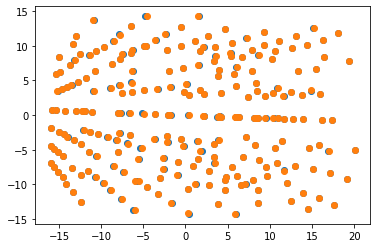

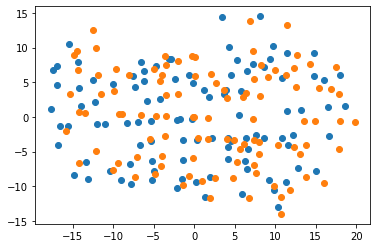

In [ ]:
# Show Training Latent Space

plt.figure()
plt.scatter(pca_train[:,0],pca_train[:,1])
plt.scatter(gpr.predict(TRAIN_PARAMS)[:,0],gpr.predict(TRAIN_PARAMS)[:,1])

# Show Validation Latent Space

plt.figure()
plt.scatter(pca_val[:,0],pca_val[:,1])
plt.scatter(gpr.predict(TEST_PARAMS)[:,0],gpr.predict(TEST_PARAMS)[:,1])

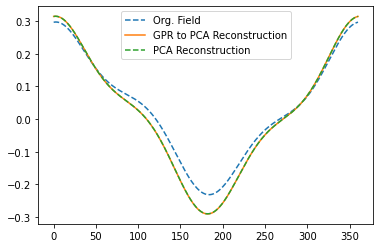

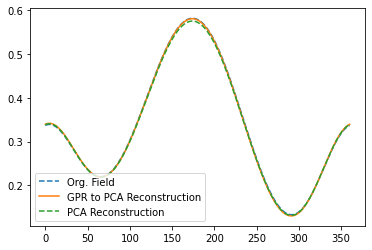

In [ ]:
train_sample = np.random.randint(0,len(train_data)-1)
test_sample = np.random.randint(0,len(test_data)-1)
# Plot Training Field Reconstruction
plt.figure()
plt.plot(TRAIN_FIELDS[train_sample,:,1,1], label = 'Org. Field',linestyle =  '--')
plt.plot(GPR_TRAIN_RECONSTRUCTED_FIELD[train_sample,:,1,1],label = 'GPR to PCA Reconstruction')
plt.plot(PCA_TRAIN_RECONSTRUCTED_FIELD[train_sample,:,1,1],label = 'PCA Reconstruction',linestyle =  '--')
plt.legend()

# Plot Validation Field Reconstruction

plt.figure()
plt.plot(TEST_FIELDS[test_sample,:,1,1], label = 'Org. Field',linestyle =  '--')
plt.plot(GPR_TEST_RECONSTRUCTED_FIELD[test_sample,:,1,1],label = 'GPR to PCA Reconstruction')
plt.plot(PCA_TEST_RECONSTRUCTED_FIELD[test_sample,:,1,1],label = 'PCA Reconstruction',linestyle =  '--')
plt.legend()
